/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Mean Squared Error: 6.882151948002502
R2 Score: 0.9643757906282626


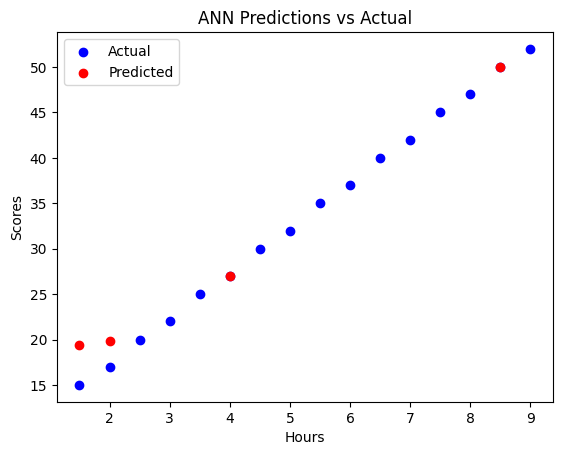

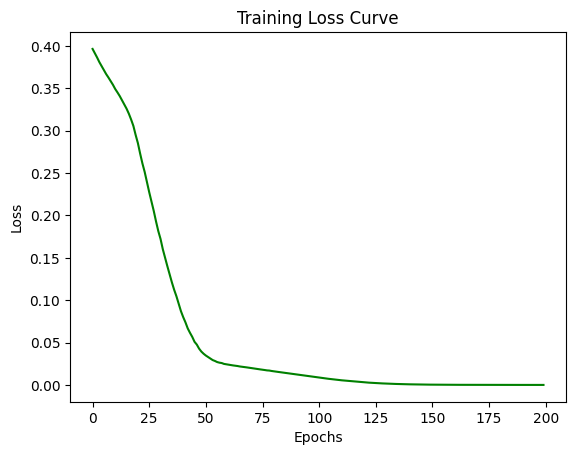

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.DataFrame({
    "Hours": [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0],
    "Scores": [15, 17, 20, 22, 25, 27, 30, 32, 35, 37, 40, 42, 45, 47, 50, 52]
})

X = data[["Hours"]].values
y = data["Scores"].values


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

model = Sequential([
    Dense(16, input_dim=1, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=200, batch_size=4, verbose=0)

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(scaler_X.inverse_transform(X_test), y_pred, color='red', label='Predicted')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("ANN Predictions vs Actual")
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
